# Feature preprocessing and Engineering para predecir si contrata préstamo o no

In [2]:
import pandas as pd
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Populating the interactive namespace from numpy and matplotlib


In [44]:
# Cargamos los datos que hemos procesado en R
df_original= pd.read_csv("C://Master Data Science/Master en Data Science/TFM/Transacciones de Banco Checo/DFTenenciaProductos2.csv")

In [45]:
df_original.columns[df.isnull().sum()!=0]

Index(['client_id_disponent', 'sex_disponent', 'birth_disponent', 'loan_id',
       'Date_Loan', 'Amount_Loan', 'Duration_Loan', 'Payments_Loan', 'status',
       'Status_Loan', 'owner_card_date'],
      dtype='object')

In [42]:
print(df_original.iloc[:,30:70].dtypes)

owner_card_date                 object
district_name                   object
region                          object
num_inhabitants                  int64
municip < 499                    int64
municip 500-1999                 int64
municip 2000-9999                int64
municip > 10000                  int64
num_cities                       int64
ratio_urban_inhabitants        float64
avg_salary                       int64
unemployment_rate_95           float64
unemployment_rate_96           float64
entrepreneurs                    int64
crimes_95                      float64
crimes_96                        int64
crimes_95_ratio                float64
crimes_96_ratio                float64
entrepreneurs_ratio            float64
Num_Type_Credit                  int64
Num_Type_VYBER                   int64
Num_Type_Withdrawal              int64
Num_Op_Null                      int64
Num_Op_Remittances               int64
Num_Op_Collection                int64
Num_Op_CashCredit        

In [ ]:
#Variables que no consideramos: district_id, account_id, client_id_owner,disponent_card_type (no aporta información), 
#district_name (podemos plantearnos incluirla en el futuro), region, client_id_disponent

#Variables que no consideramos por ser relativas a los préstamos: loan_id, Date_Loan, Amount_Loan, Duration_Loan,Payments_Loan,
#status, Status_Loan

#De momento no consideramos las fechas: Date_Account, birth_owner, Date_Loan

#account_disponent_bin no la incluimos porque es la variable a predecir

In [53]:
df_original.columns[df.dtypes==object] 

Index(['frequency', 'Date_Account', 'sex_owner', 'birth_owner',
       'sex_disponent', 'birth_disponent', 'Date_Loan', 'status',
       'Status_Loan', 'owner_card_date', 'district_name', 'region'],
      dtype='object')

In [47]:
y_original=df_original["account_loan_bin"]

In [84]:
df_num=df[['Ord_Insurance', 'Ord_Insurance_amount', 'Ord_Household_Payment',
       'Ord_Household_Payment_amount', 'Ord_Loan_Payment', 'Ord_Leasing',
       'Ord_Empty', 'Ord_Empty_amount', 
       'num_inhabitants', 'municip < 499',
       'municip 500-1999', 'municip 2000-9999', 'municip > 10000',
       'num_cities', 'avg_salary', 'entrepreneurs', 'crimes_96',
       'Num_Type_Credit', 'Num_Type_VYBER', 'Num_Type_Withdrawal',
       'Num_Op_Null', 'Num_Op_Remittances', 'Num_Op_Collection',
       'Num_Op_CashCredit', 'Num_Op_WithdrawalCash',
       'Num_Op_WithdrawalCreditCard', 'Num_Sym_Null', 'Num_Sym_Null2',
       'Num_Sym_Pension', 'Num_Sym_Insurance', 'Num_Sym_NegBal',
       'Num_Sym_Household', 'Num_Sym_Statement', 'Num_Sym_IntDep',
       'Num_Sym_LoanPayment', 'Balance_in_negative','Ord_Loan_Payment_amount', 'Ord_Leasing_amount',
       'ratio_urban_inhabitants', 'unemployment_rate_95',
       'unemployment_rate_96', 'crimes_95', 'crimes_95_ratio',
       'crimes_96_ratio', 'entrepreneurs_ratio' ]] 

In [58]:
df_cat=df[['account_disponent_bin','frequency', 'sex_owner', 'owner_card_type',
       'sex_disponent']]

In [64]:
#Ponemos la variable como string para poder obtener dummy
df_cat["owner_card_type"]=df_cat["owner_card_type"].astype(str)

C:\Users\osmaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
#Ponemos la variable como string para poder obtener dummy
df_cat["account_disponent_bin"]=df_cat["account_disponent_bin"].astype(str)

C:\Users\osmaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
df_cat_dumm=pd.get_dummies(df_cat)

In [69]:
print(df_cat_dumm.columns)

Index(['account_disponent_bin_0', 'account_disponent_bin_1',
       'frequency_After_trans', 'frequency_Monthly', 'frequency_Weekly',
       'sex_owner_F', 'sex_owner_M', 'owner_card_type_0', 'owner_card_type_1',
       'owner_card_type_2', 'owner_card_type_3', 'sex_disponent_F',
       'sex_disponent_M'],
      dtype='object')


In [70]:
df = pd.concat([df_num, df_cat_dumm], axis = 1)

In [85]:
#Vemos que tener un préstamo corrleciona de forma muy significativa con las variables:Ord_Loan_Payment,Num_Sym_LoanPayment y 
#Ord_Loan_Payment_amount

df_corr.corr()

,account_loan_bin,Ord_Insurance,Ord_Insurance_amount,Ord_Household_Payment,Ord_Household_Payment_amount,Ord_Loan_Payment,Ord_Leasing,Ord_Empty,Ord_Empty_amount,owner_card_type,...,frequency_Monthly,frequency_Weekly,sex_owner_F,sex_owner_M,owner_card_type_0,owner_card_type_1,owner_card_type_2,owner_card_type_3,sex_disponent_F,sex_disponent_M
account_loan_bin,1.000000,0.064054,0.066203,-0.115103,0.065080,0.970807,-0.121020,0.076714,0.098316,0.033378,...,-0.171711,0.150660,0.016568,-0.016568,-0.054115,0.058062,0.011919,-0.003424,0.005798,0.022147
Ord_Insurance,0.064054,1.000000,0.567956,0.168059,0.001855,0.070023,0.025191,0.698053,0.269705,-0.007453,...,-0.020067,0.017235,0.021981,-0.021981,0.004237,0.000178,-0.002006,-0.008349,0.007756,0.009177
Ord_Insurance_amount,0.066203,0.567956,1.000000,0.095450,-0.040834,0.077277,0.042197,0.349677,0.184721,-0.007641,...,-0.049739,0.036498,-0.022466,0.022466,-0.000758,0.008483,-0.000372,-0.014979,0.028694,-0.013187
Ord_Household_Payment,-0.115103,0.168059,0.095450,1.000000,0.523637,-0.128155,-0.097967,0.259851,0.185304,-0.134117,...,0.147837,-0.122341,-0.009489,0.009489,0.117869,-0.068745,-0.028177,-0.106367,0.103931,0.068390
Ord_Household_Payment_amount,0.065080,0.001855,-0.040834,0.523637,1.000000,0.058743,0.042773,-0.000584,-0.077847,0.019457,...,-0.026559,0.009805,-0.025357,0.025357,-0.053454,0.072750,-0.002490,-0.023025,0.052737,0.039149
Ord_Loan_Payment,0.970807,0.070023,0.077277,-0.128155,0.058743,1.000000,-0.124659,0.078837,0.095569,0.030054,...,-0.180789,0.158784,0.009950,-0.009950,-0.050070,0.054955,0.008677,-0.003794,0.017166,0.018896
Ord_Leasing,-0.121020,0.025191,0.042197,-0.097967,0.042773,-0.124659,1.000000,0.019396,0.037639,0.035345,...,-0.133977,0.088992,-0.025729,0.025729,-0.051407,0.052400,0.008075,0.004813,-0.017341,-0.019200
Ord_Empty,0.076714,0.698053,0.349677,0.259851,-0.000584,0.078837,0.019396,1.000000,0.634805,0.012334,...,-0.004633,0.008137,0.033976,-0.033976,-0.020238,0.020964,0.008992,-0.003335,-0.005430,0.039880
Ord_Empty_amount,0.098316,0.269705,0.184721,0.185304,-0.077847,0.095569,0.037639,0.634805,1.000000,0.025062,...,-0.034630,0.029918,-0.002383,0.002383,-0.035580,0.031626,0.026435,-0.003722,-0.015333,0.015941
owner_card_type,0.033378,-0.007453,-0.007641,-0.134117,0.019457,0.030054,0.035345,0.012334,0.025062,1.000000,...,-0.042500,0.046883,-0.015600,0.015600,-0.860575,0.450772,0.367822,0.751884,-0.021996,-0.027357


(array([3968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

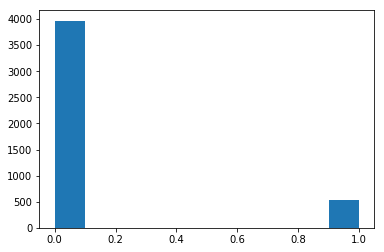

In [86]:
plt.hist(df["Ord_Insurance"])

(array([4.34e+03, 7.20e+01, 4.40e+01, 1.60e+01, 1.10e+01, 1.00e+01,
        4.00e+00, 1.00e+00, 1.00e+00, 1.00e+00]),
 array([    0. ,  1250.4,  2500.8,  3751.2,  5001.6,  6252. ,  7502.4,
         8752.8, 10003.2, 11253.6, 12504. ]),
 <a list of 10 Patch objects>)

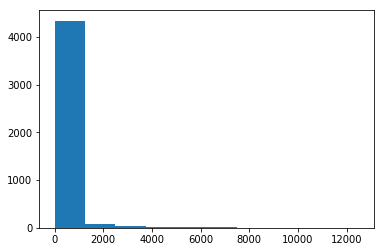

In [87]:
plt.hist(df['Ord_Insurance_amount'])

(array([1135.,    0.,    0.,    0.,    0., 3228.,    0.,    0.,    0.,
         137.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

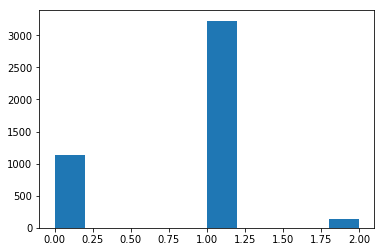

In [88]:
plt.hist(df['Ord_Household_Payment'])

(array([1521., 1044.,  761.,  396.,  298.,  225.,  147.,   43.,   34.,
          31.]),
 array([    0. ,  1488.2,  2976.4,  4464.6,  5952.8,  7441. ,  8929.2,
        10417.4, 11905.6, 13393.8, 14882. ]),
 <a list of 10 Patch objects>)

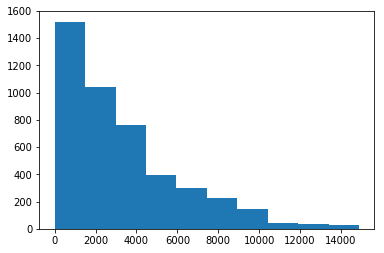

In [89]:
plt.hist(df['Ord_Household_Payment_amount'])

(array([3783.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         717.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

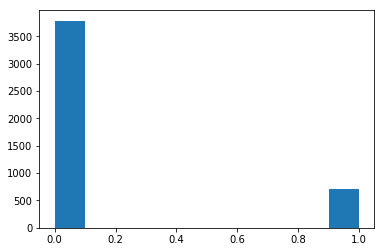

In [90]:
plt.hist(df['Ord_Loan_Payment'])

(array([4159.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         341.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

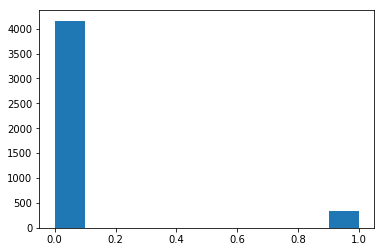

In [91]:
plt.hist(df['Ord_Leasing'])

(array([3302.,    0.,    0.,    0.,    0., 1017.,    0.,    0.,    0.,
         181.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

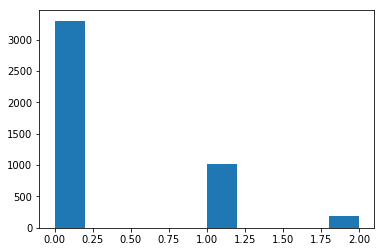

In [92]:
plt.hist(df['Ord_Empty'])

(array([3.802e+03, 3.040e+02, 1.560e+02, 9.900e+01, 6.600e+01, 3.800e+01,
        1.600e+01, 1.200e+01, 3.000e+00, 4.000e+00]),
 array([    0. ,  1292.5,  2585. ,  3877.5,  5170. ,  6462.5,  7755. ,
         9047.5, 10340. , 11632.5, 12925. ]),
 <a list of 10 Patch objects>)

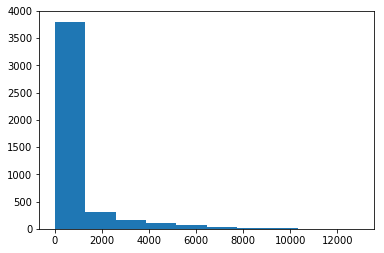

In [93]:
plt.hist(df['Ord_Empty_amount'])

In [ ]:
plt.hist(df['Ord_Empty_amount'])

(array([1441.,  561.,  622.,  605.,  594.,  374.,  205.,    0.,    0.,
          98.]),
 array([  0. ,  15.1,  30.2,  45.3,  60.4,  75.5,  90.6, 105.7, 120.8,
        135.9, 151. ]),
 <a list of 10 Patch objects>)

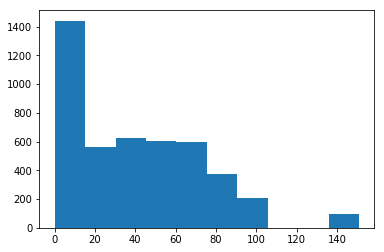

In [97]:
plt.hist(df['municip < 499'])

(array([1055.,  414.,  680.,  790.,  681.,  639.,   44.,  144.,    0.,
          53.]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

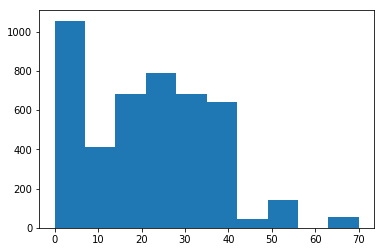

In [98]:
plt.hist(df['municip 500-1999'])

(array([ 185.,    0., 2255.,    0., 1157.,    0.,  582.,    0.,  169.,
         152.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

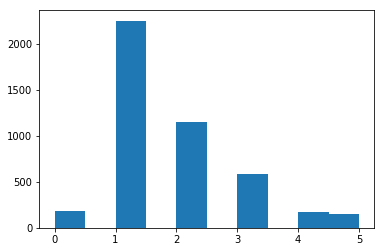

In [99]:
plt.hist(df['municip > 10000'])

(array([862.,  37.,  93., 580., 467., 702., 631., 324., 328., 476.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

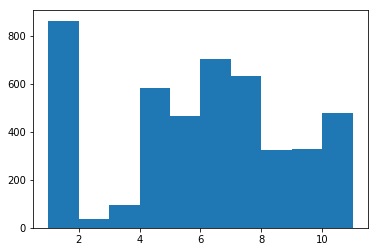

In [100]:
plt.hist(df['num_cities'])

(array([1153., 1206.,  451.,  363.,  496.,  176.,   45.,   56.,    0.,
         554.]),
 array([ 8110. ,  8553.1,  8996.2,  9439.3,  9882.4, 10325.5, 10768.6,
        11211.7, 11654.8, 12097.9, 12541. ]),
 <a list of 10 Patch objects>)

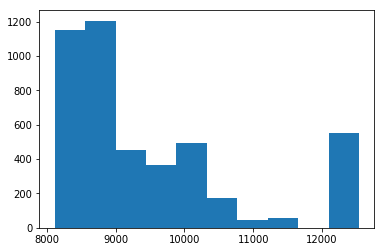

In [101]:
plt.hist(df['avg_salary'])

(array([200., 354., 644., 992., 517., 757., 259., 138.,  85., 554.]),
 array([ 81. ,  89.6,  98.2, 106.8, 115.4, 124. , 132.6, 141.2, 149.8,
        158.4, 167. ]),
 <a list of 10 Patch objects>)

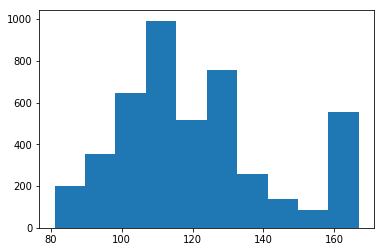

In [102]:
plt.hist(df['entrepreneurs'])

(array([3683.,  263.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         554.]),
 array([  888. , 10709.9, 20531.8, 30353.7, 40175.6, 49997.5, 59819.4,
        69641.3, 79463.2, 89285.1, 99107. ]),
 <a list of 10 Patch objects>)

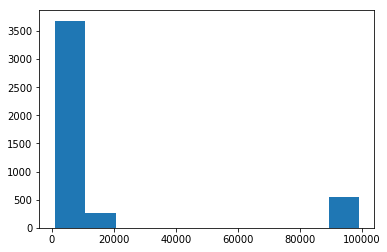

In [103]:
plt.hist(df['crimes_96'])

(array([ 283., 1086., 1017.,  659.,  757.,  460.,  150.,   53.,   27.,
           8.]),
 array([  6. ,  32.6,  59.2,  85.8, 112.4, 139. , 165.6, 192.2, 218.8,
        245.4, 272. ]),
 <a list of 10 Patch objects>)

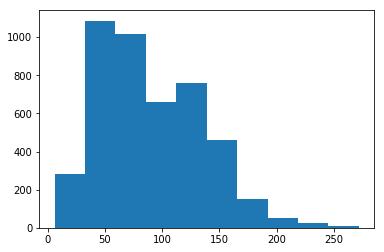

In [104]:
plt.hist(df['Num_Type_Credit'])

(array([3564.,  292.,  238.,  158.,   96.,   72.,   39.,   26.,   10.,
           5.]),
 array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. , 32.4, 37.8, 43.2, 48.6, 54. ]),
 <a list of 10 Patch objects>)

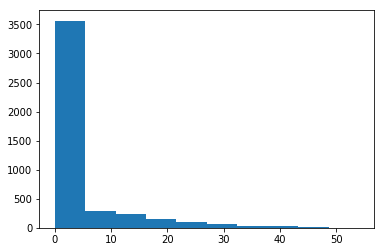

In [105]:
plt.hist(df['Num_Type_VYBER'])

(array([6.740e+02, 1.753e+03, 8.900e+02, 1.104e+03, 1.500e+01, 1.800e+01,
        3.200e+01, 1.300e+01, 0.000e+00, 1.000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <a list of 10 Patch objects>)

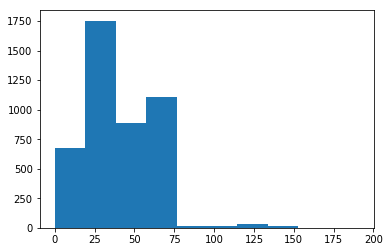

In [107]:
plt.hist(df['Num_Op_Null'])

In [ ]:
plt.hist(df['Num_Op_Null']

(array([2033., 1065.,  726.,  229.,  224.,   71.,   77.,   34.,   22.,
          19.]),
 array([  0. ,  28.7,  57.4,  86.1, 114.8, 143.5, 172.2, 200.9, 229.6,
        258.3, 287. ]),
 <a list of 10 Patch objects>)

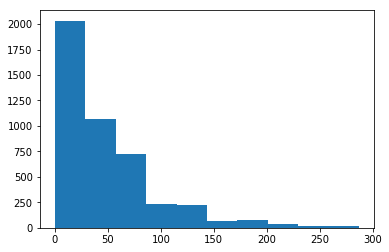

In [108]:
plt.hist(df['Num_Op_Remittances'])

(array([2894.,   66.,  204.,  272.,  255.,  153.,  120.,   91.,  184.,
         261.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

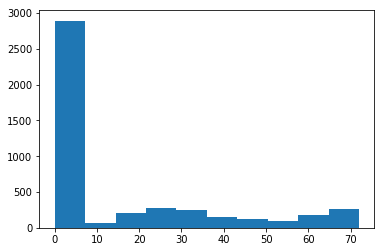

In [109]:
plt.hist(df['Num_Op_Collection'])

(array([1783.,  901.,  645.,  639.,  273.,  148.,   77.,   18.,    8.,
           8.]),
 array([  1. ,  19.3,  37.6,  55.9,  74.2,  92.5, 110.8, 129.1, 147.4,
        165.7, 184. ]),
 <a list of 10 Patch objects>)

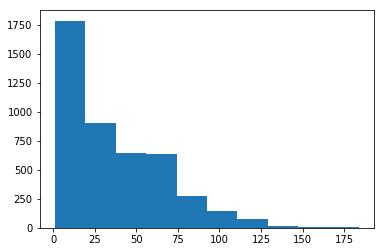

In [110]:
plt.hist(df['Num_Op_CashCredit'])

(array([ 497., 1192.,  992.,  696.,  599.,  336.,  137.,   35.,   13.,
           3.]),
 array([  1. ,  34.7,  68.4, 102.1, 135.8, 169.5, 203.2, 236.9, 270.6,
        304.3, 338. ]),
 <a list of 10 Patch objects>)

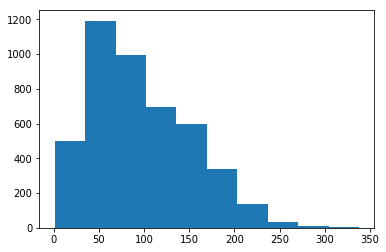

In [111]:
plt.hist(df['Num_Op_WithdrawalCash'])

(array([ 712., 1188.,  959.,  570.,  524.,  350.,  134.,   50.,    9.,
           4.]),
 array([  5.,  43.,  81., 119., 157., 195., 233., 271., 309., 347., 385.]),
 <a list of 10 Patch objects>)

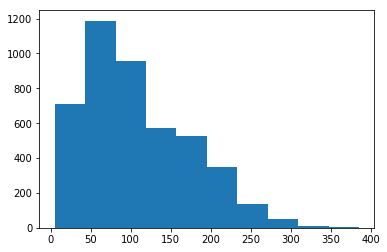

In [113]:
plt.hist(df['Num_Sym_Null'])

(array([ 712., 1188.,  959.,  570.,  524.,  350.,  134.,   50.,    9.,
           4.]),
 array([  5.,  43.,  81., 119., 157., 195., 233., 271., 309., 347., 385.]),
 <a list of 10 Patch objects>)

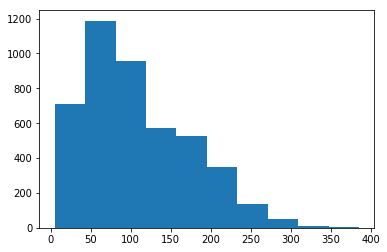

In [114]:
plt.hist(df['Num_Sym_Null'])

(array([3319.,  325.,  281.,  175.,  283.,   43.,   13.,   13.,   20.,
          28.]),
 array([  0. ,  13.4,  26.8,  40.2,  53.6,  67. ,  80.4,  93.8, 107.2,
        120.6, 134. ]),
 <a list of 10 Patch objects>)

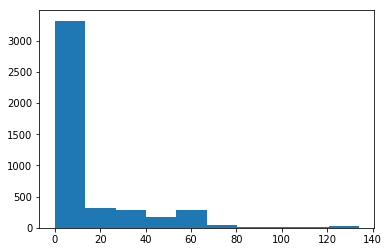

In [115]:
plt.hist(df['Num_Sym_Null2'])

(array([3760.,   31.,   90.,  132.,  103.,   71.,   53.,   47.,   99.,
         114.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

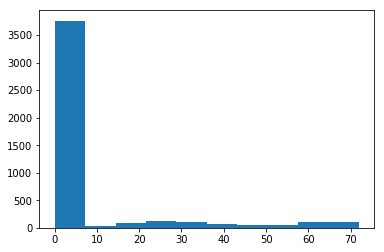

In [116]:
plt.hist(df['Num_Sym_Pension'])

(array([3992.,   53.,   67.,   91.,   54.,   49.,   37.,   31.,   67.,
          59.]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

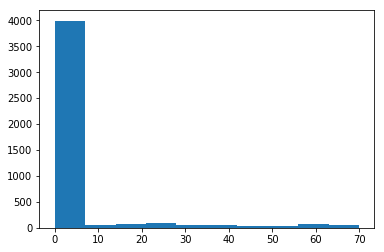

In [117]:
plt.hist(df['Num_Sym_Insurance'])

(array([4.369e+03, 5.900e+01, 3.000e+01, 2.400e+01, 7.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

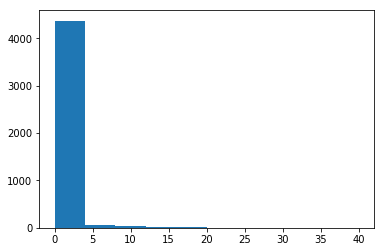

In [118]:
plt.hist(df['Num_Sym_NegBal'])

(array([1225.,  377.,  452.,  593.,  409.,  268.,  212.,  237.,  461.,
         266.]),
 array([ 0. ,  7.1, 14.2, 21.3, 28.4, 35.5, 42.6, 49.7, 56.8, 63.9, 71. ]),
 <a list of 10 Patch objects>)

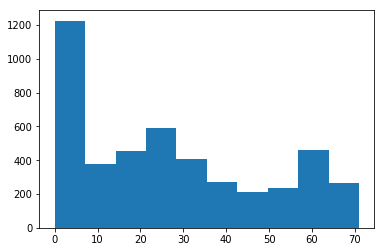

In [119]:
plt.hist(df['Num_Sym_Household'])

(array([6.740e+02, 1.753e+03, 8.900e+02, 1.104e+03, 1.500e+01, 1.800e+01,
        3.200e+01, 1.300e+01, 0.000e+00, 1.000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <a list of 10 Patch objects>)

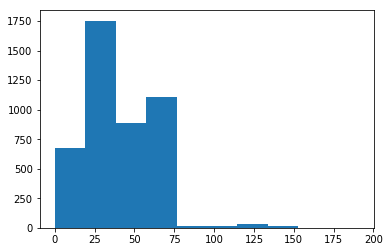

In [120]:
plt.hist(df['Num_Sym_IntDep'])

(array([3874.,  119.,  174.,   80.,  115.,   30.,   56.,   22.,   18.,
          12.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

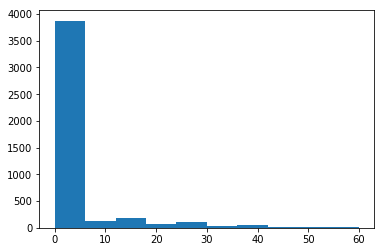

In [121]:
plt.hist(df['Num_Sym_LoanPayment'])

(array([4.439e+03, 2.700e+01, 1.900e+01, 6.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([  0. ,  12.4,  24.8,  37.2,  49.6,  62. ,  74.4,  86.8,  99.2,
        111.6, 124. ]),
 <a list of 10 Patch objects>)

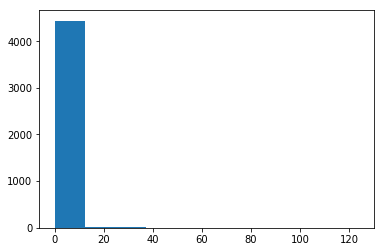

In [122]:
plt.hist(df['Balance_in_negative'])

(array([3819.,   96.,  100.,  123.,  108.,   77.,   68.,   64.,   32.,
          13.]),
 array([   0.,  991., 1982., 2973., 3964., 4955., 5946., 6937., 7928.,
        8919., 9910.]),
 <a list of 10 Patch objects>)

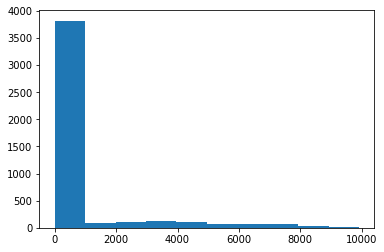

In [123]:
plt.hist(df['Ord_Loan_Payment_amount'])

(array([4164.,   35.,   68.,   73.,   40.,   29.,   31.,   21.,   20.,
          19.]),
 array([   0.  ,  497.52,  995.04, 1492.56, 1990.08, 2487.6 , 2985.12,
        3482.64, 3980.16, 4477.68, 4975.2 ]),
 <a list of 10 Patch objects>)

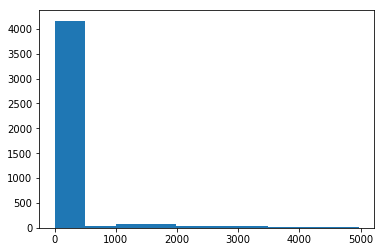

In [124]:
plt.hist(df['Ord_Leasing_amount'])

(array([146., 343., 780., 608., 576., 355., 224., 374., 232., 862.]),
 array([ 33.9 ,  40.51,  47.12,  53.73,  60.34,  66.95,  73.56,  80.17,
         86.78,  93.39, 100.  ]),
 <a list of 10 Patch objects>)

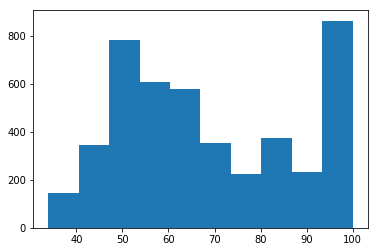

In [125]:
plt.hist(df['ratio_urban_inhabitants'])

(array([689., 722., 478., 599., 768., 267., 423., 182., 277.,  95.]),
 array([0.29 , 0.995, 1.7  , 2.405, 3.11 , 3.815, 4.52 , 5.225, 5.93 ,
        6.635, 7.34 ]),
 <a list of 10 Patch objects>)

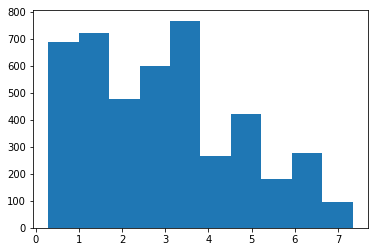

In [126]:
plt.hist(df['unemployment_rate_95'])

(array([768., 601., 704., 701., 672., 529.,  98.,  92., 294.,  41.]),
 array([0.43 , 1.327, 2.224, 3.121, 4.018, 4.915, 5.812, 6.709, 7.606,
        8.503, 9.4  ]),
 <a list of 10 Patch objects>)

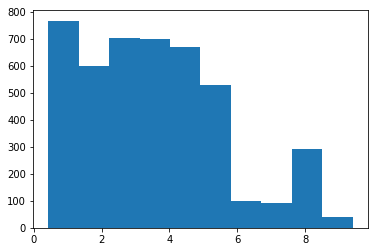

In [127]:
plt.hist(df['unemployment_rate_96'])

(array([3443.,  240.,  263.,    0.,    0.,    0.,    0.,    0.,    0.,
         554.]),
 array([  818. ,  9303.9, 17789.8, 26275.7, 34761.6, 43247.5, 51733.4,
        60219.3, 68705.2, 77191.1, 85677. ]),
 <a list of 10 Patch objects>)

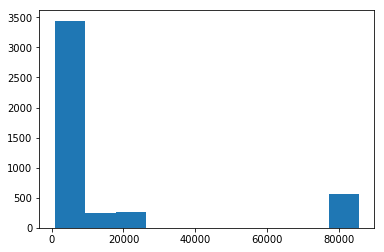

In [128]:
plt.hist(df['crimes_95'])

(array([3443.,  240.,  263.,    0.,    0.,    0.,    0.,    0.,    0.,
         554.]),
 array([  818. ,  9303.9, 17789.8, 26275.7, 34761.6, 43247.5, 51733.4,
        60219.3, 68705.2, 77191.1, 85677. ]),
 <a list of 10 Patch objects>)

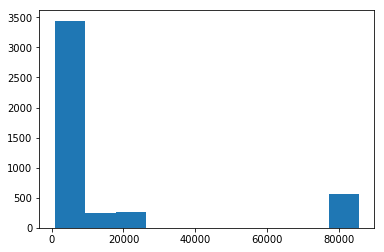

In [129]:
plt.hist(df['crimes_95'])

(array([ 596., 1052.,  499.,  760.,  370.,  317.,  128.,  224.,    0.,
         554.]),
 array([0.01354271, 0.01929884, 0.02505497, 0.0308111 , 0.03656723,
        0.04232336, 0.04807949, 0.05383562, 0.05959176, 0.06534789,
        0.07110402]),
 <a list of 10 Patch objects>)

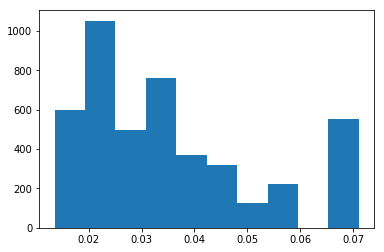

In [130]:
plt.hist(df['crimes_95_ratio'])

(array([1141.,  804.,  726.,  637.,  415.,   88.,  135.,    0.,    0.,
         554.]),
 array([0.0159461 , 0.02257646, 0.02920682, 0.03583717, 0.04246753,
        0.04909789, 0.05572825, 0.06235861, 0.06898896, 0.07561932,
        0.08224968]),
 <a list of 10 Patch objects>)

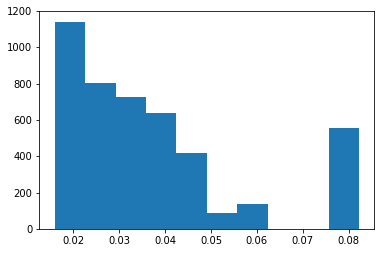

In [131]:
plt.hist(df['crimes_96_ratio'])

(array([ 969.,  322., 1256.,  793.,  312.,  388.,  177.,  192.,   43.,
          48.]),
 array([0.00013859, 0.00041431, 0.00069003, 0.00096575, 0.00124147,
        0.00151719, 0.0017929 , 0.00206862, 0.00234434, 0.00262006,
        0.00289578]),
 <a list of 10 Patch objects>)

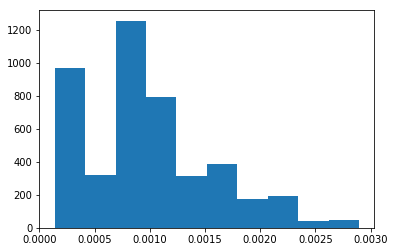

In [132]:
plt.hist(df['entrepreneurs_ratio'])

In [ ]:
df_num=df[['Ord_Insurance', 'Ord_Insurance_amount', 'Ord_Household_Payment',
       'Ord_Household_Payment_amount', 'Ord_Loan_Payment', 'Ord_Leasing',
       'Ord_Empty', 'Ord_Empty_amount', 
       'num_inhabitants', 'municip < 499',
       'municip 500-1999', 'municip 2000-9999', 'municip > 10000',
       'num_cities', 'avg_salary', 'entrepreneurs', 'crimes_96',
       'Num_Type_Credit', 'Num_Type_VYBER', 'Num_Type_Withdrawal',
       'Num_Op_Null', 'Num_Op_Remittances', 'Num_Op_Collection',
       'Num_Op_CashCredit', 'Num_Op_WithdrawalCash',
       'Num_Op_WithdrawalCreditCard', 'Num_Sym_Null', 'Num_Sym_Null2',
       'Num_Sym_Pension', 'Num_Sym_Insurance', 'Num_Sym_NegBal',
       'Num_Sym_Household', 'Num_Sym_Statement', 'Num_Sym_IntDep',
       'Num_Sym_LoanPayment', 'Balance_in_negative','Ord_Loan_Payment_amount', 'Ord_Leasing_amount',
       'ratio_urban_inhabitants', 'unemployment_rate_95',
       'unemployment_rate_96', 'crimes_95', 'crimes_95_ratio',
       'crimes_96_ratio', 'entrepreneurs_ratio' ]] 